In [1]:
from tensorflow.keras.datasets import mnist
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Creating the pair images generator

##### The function will take the images of directory and create pairs based on the matching labels

In [40]:
def make_pairs(images, labels):

    #1. Create empty list to fill them with each image and their corresponding labels
    pairImages = []
    pairLabels = []

    #obtain the labels used
    numClasess = len(np.unique(labels)) 
    #Go through all the labels and if they match get the index and save it all to a list
    idx = [np.where(labels == i)[0] for i in range(0, numClasess)]

    #Now, time to loop through all images
    for idxA in range(len(images)):
        #get the image and label
        currentImage = images[idxA]
        currentLabel = labels[idxA]

        #Randomly get an image that belongs to the same class label and assign it image B (the other positive image)
        idxB = np.random.choice(idx[currentLabel]) #get it from the list with all indexes
        posimage = images[idxB]

        #Now that we have both positives images (currentImage, ImageB) whe can append them
        pairImages.append([currentImage, posimage])
        pairLabels.append([1]) #1 to indicate that this pair is a positive (1) type. (0 is for negative)

        #With the positive images done, we need to get the negatives ones
        negIdx = np.where(labels != currentLabel)[0]
        negImage = images[np.random.choice(negIdx)]

        #pair the negative images
        pairImages.append([currentImage, negImage])
        pairLabels.append([0])

    return (np.array(pairImages), np.array(pairLabels))

### Try the function

In [41]:
(trainX, trainY), (testX, testY) = mnist.load_data()

(pairTrain, labelTrain) = make_pairs(trainX, trainY)
(pairTest, labelTest) = make_pairs(testX, testY)

### Save all images into a collage

In [48]:
#create an empty list to put the images
images = []

#Loop over the train pairs. We define an embedding space of 49 samples.
for i in np.random.choice(np.arange(0, len(pairTrain)), size=(49,)): 
    imageA = pairTrain[i][0]
    imageB = pairTrain[i][1]
    label = labelTrain[i]

    #Stack the pair of images. But, we will add some padding. Four pixels on both x (0:56) and y axis (4:32)
    #This is in order to give some space to add the positive and negative annotations
    output = np.zeros((36, 60), dtype="uint8")
    pair = np.hstack([imageA, imageB])
    output[4:32, 0:56] = pair

    #Set the text label for the pair and the color for the label. Green for positive and red for negative.
    text = "neg" if label[0]== 0 else "pos"
    color = (255,0,0) if label[0] == 0 else (0,255,0)

    #radd a 3rd channel to the image in order to use the montage function from imutils and avoid overlapping.A 3rd channel gives 'space". Also, resize the image
    vis = cv2.merge([output] * 3)
    vis = cv2.resize(vis, (96,51), interpolation=cv2.INTER_LINEAR)
    cv2.putText(vis, text, (2,12), cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)

    #Append the images to the list in order to visualize all of them together
    images.append(vis)

### Visualize

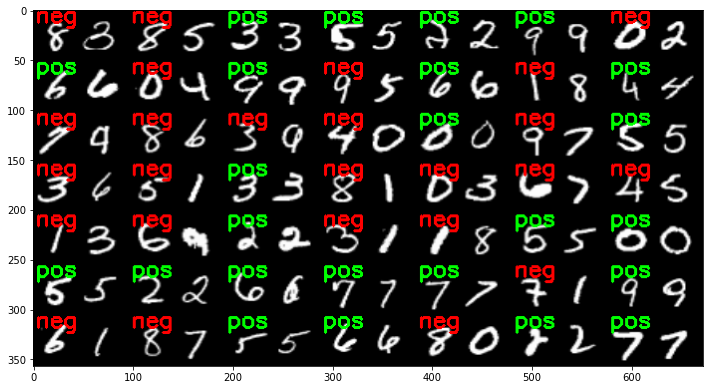

In [49]:
from unicodedata import name


montage = build_montages(images, (96,51), (7,7))[0]

plt.figure(figsize=(12, 12))
image = cv2.cvtColor(montage, cv2.COLOR_BGR2RGB)
plt.grid(False)
plt.imshow(montage)
plt.show()